Data import and preprocess

In [121]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [122]:
data = pd.read_csv("kc_house_data.csv")

In [123]:
data.shape

(21613, 21)

In [124]:
pd.options.display.max_columns = 25

In [125]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [126]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [127]:
data['year'] = pd.to_numeric(data['date'].str.slice(0,4))

In [128]:
data['month'] = pd.to_numeric(data['date'].str.slice(4,6))

In [129]:
data['day'] = pd.to_numeric(data['date'].str.slice(6,8))

In [130]:
data.drop(['id'], axis="columns", inplace=True)

In [131]:
data.drop(['date'], axis="columns", inplace=True)

In [132]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [133]:
data_num = data.shape[0]

In [134]:
indexes = np.random.permutation(data_num)

In [135]:
train_indexes = indexes[:int(data_num *0.6)]

In [136]:
val_indexes = indexes[int(data_num * 0.6):int(data_num *0.8)]

In [137]:
test_indexes = indexes[int(data_num *0.8):]

In [138]:
train_data = data.loc[train_indexes]

In [139]:
val_data = data.loc[val_indexes]

In [140]:
test_data = data.loc[test_indexes]

Normalization

In [141]:
train_validation_data = pd.concat([train_data, val_data])

In [142]:
mean = train_validation_data.mean()

In [143]:
std = train_validation_data.std()

In [144]:
train_data = (train_data - mean) / std

In [145]:
val_data = (val_data - mean) / std

In [146]:
x_train = np.array(train_data.drop('price', axis='columns'))

In [147]:
y_train = np.array(train_data['price'])

In [148]:
x_val = np.array(val_data.drop('price', axis='columns'))

In [149]:
y_val = np.array(val_data['price'])

In [150]:
x_train.shape

(12967, 21)

In [151]:
model = keras.Sequential(name='model-1')

In [152]:
model.add(layers.Dense(64, activation='relu', input_shape=(21,)))

In [153]:
model.add(layers.Dense(64, activation='relu'))

In [154]:
model.add(layers.Dense(1))

In [155]:
model.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.compile(keras.optimizers.Adam(0.001),
              loss = keras.losses.MeanSquaredError(),
              metrics = [keras.metrics.MeanAbsoluteError()])

In [157]:
model_dir = 'lab2-logs/models/'

In [158]:
os.makedirs(model_dir)

In [159]:
log_dir = os.path.join('lab2-logs', 'model-1')

In [160]:
print(log_dir)

lab2-logs\model-1


In [161]:
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

In [162]:
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5',
                                            monitor='val_mean_absolute_error',
                                            save_best_only = True,
                                            mode= 'min')

In [163]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=300,
                    validation_data=(x_val, y_val),
                    callbacks=[model_cbk,model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 2s 117us/sample - loss: 0.3285 - mean_absolute_error: 0.3456 - val_loss: 0.2277 - val_mean_absolute_error: 0.2904
Epoch 2/300
12967/12967 [==============================] - 1s 81us/sample - loss: 0.1961 - mean_absolute_error: 0.2750 - val_loss: 0.1936 - val_mean_absolute_error: 0.2617
Epoch 3/300
12967/12967 [==============================] - 1s 80us/sample - loss: 0.1649 - mean_absolute_error: 0.2518 - val_loss: 0.1822 - val_mean_absolute_error: 0.2574
Epoch 4/300
12967/12967 [==============================] - 1s 79us/sample - loss: 0.1489 - mean_absolute_error: 0.2385 - val_loss: 0.1660 - val_mean_absolute_error: 0.2416
Epoch 5/300
12967/12967 [==============================] - 1s 77us/sample - loss: 0.1333 - mean_absolute_error: 0.2248 - val_loss: 0.1696 - val_mean_absolute_error: 0.2412
Epoch 6/300
12967/12967 [==============================] - 1s 78us/sample - loss: 0.1284 -

12967/12967 [==============================] - 1s 67us/sample - loss: 0.0529 - mean_absolute_error: 0.1594 - val_loss: 0.1368 - val_mean_absolute_error: 0.2099
Epoch 49/300
12967/12967 [==============================] - 1s 67us/sample - loss: 0.0544 - mean_absolute_error: 0.1614 - val_loss: 0.1482 - val_mean_absolute_error: 0.2121
Epoch 50/300
12967/12967 [==============================] - 1s 80us/sample - loss: 0.0509 - mean_absolute_error: 0.1575 - val_loss: 0.1495 - val_mean_absolute_error: 0.2236
Epoch 51/300
12967/12967 [==============================] - 1s 83us/sample - loss: 0.0518 - mean_absolute_error: 0.1588 - val_loss: 0.1364 - val_mean_absolute_error: 0.2107
Epoch 52/300
12967/12967 [==============================] - 1s 75us/sample - loss: 0.0504 - mean_absolute_error: 0.1562 - val_loss: 0.1547 - val_mean_absolute_error: 0.2208
Epoch 53/300
12967/12967 [==============================] - 1s 71us/sample - loss: 0.0504 - mean_absolute_error: 0.1573 - val_loss: 0.1431 - val_mea

12967/12967 [==============================] - 1s 71us/sample - loss: 0.0390 - mean_absolute_error: 0.1428 - val_loss: 0.1483 - val_mean_absolute_error: 0.2192
Epoch 96/300
12967/12967 [==============================] - 1s 72us/sample - loss: 0.0396 - mean_absolute_error: 0.1443 - val_loss: 0.1470 - val_mean_absolute_error: 0.2187
Epoch 97/300
12967/12967 [==============================] - 1s 73us/sample - loss: 0.0384 - mean_absolute_error: 0.1413 - val_loss: 0.1627 - val_mean_absolute_error: 0.2241
Epoch 98/300
12967/12967 [==============================] - 1s 72us/sample - loss: 0.0408 - mean_absolute_error: 0.1443 - val_loss: 0.1461 - val_mean_absolute_error: 0.2196
Epoch 99/300
12967/12967 [==============================] - 1s 71us/sample - loss: 0.0378 - mean_absolute_error: 0.1403 - val_loss: 0.1516 - val_mean_absolute_error: 0.2183
Epoch 100/300
12967/12967 [==============================] - 1s 80us/sample - loss: 0.0386 - mean_absolute_error: 0.1415 - val_loss: 0.1439 - val_me

12967/12967 [==============================] - 1s 68us/sample - loss: 0.0332 - mean_absolute_error: 0.1332 - val_loss: 0.1566 - val_mean_absolute_error: 0.2228
Epoch 143/300
12967/12967 [==============================] - 1s 67us/sample - loss: 0.0338 - mean_absolute_error: 0.1339 - val_loss: 0.1492 - val_mean_absolute_error: 0.2195
Epoch 144/300
12967/12967 [==============================] - 1s 67us/sample - loss: 0.0347 - mean_absolute_error: 0.1350 - val_loss: 0.1531 - val_mean_absolute_error: 0.2220s - loss: 0.0348 - mean_absolute_error: 0.134
Epoch 145/300
12967/12967 [==============================] - 1s 70us/sample - loss: 0.0339 - mean_absolute_error: 0.1346 - val_loss: 0.1527 - val_mean_absolute_error: 0.2295
Epoch 146/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0337 - mean_absolute_error: 0.1341 - val_loss: 0.1548 - val_mean_absolute_error: 0.2215
Epoch 147/300
12967/12967 [==============================] - 1s 71us/sample - loss: 0.0325 - mean_a

Epoch 189/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0321 - mean_absolute_error: 0.1308 - val_loss: 0.1566 - val_mean_absolute_error: 0.2259
Epoch 190/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0321 - mean_absolute_error: 0.1309 - val_loss: 0.1583 - val_mean_absolute_error: 0.2282
Epoch 191/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0300 - mean_absolute_error: 0.1275 - val_loss: 0.1531 - val_mean_absolute_error: 0.2256
Epoch 192/300
12967/12967 [==============================] - 1s 65us/sample - loss: 0.0300 - mean_absolute_error: 0.1278 - val_loss: 0.1601 - val_mean_absolute_error: 0.2296
Epoch 193/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0305 - mean_absolute_error: 0.1282 - val_loss: 0.1620 - val_mean_absolute_error: 0.2278
Epoch 194/300
12967/12967 [==============================] - 1s 68us/sample - loss: 0.0302 - mean_absolute_error: 0.1283 - val_los

12967/12967 [==============================] - 1s 73us/sample - loss: 0.0286 - mean_absolute_error: 0.1246 - val_loss: 0.1589 - val_mean_absolute_error: 0.2303
Epoch 237/300
12967/12967 [==============================] - 1s 72us/sample - loss: 0.0272 - mean_absolute_error: 0.1227 - val_loss: 0.1625 - val_mean_absolute_error: 0.2246
Epoch 238/300
12967/12967 [==============================] - 1s 73us/sample - loss: 0.0278 - mean_absolute_error: 0.1239 - val_loss: 0.1586 - val_mean_absolute_error: 0.2288
Epoch 239/300
12967/12967 [==============================] - 1s 74us/sample - loss: 0.0294 - mean_absolute_error: 0.1270 - val_loss: 0.1647 - val_mean_absolute_error: 0.2273
Epoch 240/300
12967/12967 [==============================] - 1s 72us/sample - loss: 0.0264 - mean_absolute_error: 0.1212 - val_loss: 0.1624 - val_mean_absolute_error: 0.2263
Epoch 241/300
12967/12967 [==============================] - 1s 71us/sample - loss: 0.0289 - mean_absolute_error: 0.1250 - val_loss: 0.1617 - va

12967/12967 [==============================] - 1s 71us/sample - loss: 0.0249 - mean_absolute_error: 0.1181 - val_loss: 0.1671 - val_mean_absolute_error: 0.2301
Epoch 284/300
12967/12967 [==============================] - 1s 71us/sample - loss: 0.0267 - mean_absolute_error: 0.1217 - val_loss: 0.1621 - val_mean_absolute_error: 0.2267
Epoch 285/300
12967/12967 [==============================] - 2s 178us/sample - loss: 0.0281 - mean_absolute_error: 0.1241 - val_loss: 0.1630 - val_mean_absolute_error: 0.2302
Epoch 286/300
12967/12967 [==============================] - 2s 123us/sample - loss: 0.0312 - mean_absolute_error: 0.1283 - val_loss: 0.1655 - val_mean_absolute_error: 0.2296
Epoch 287/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0297 - mean_absolute_error: 0.1262 - val_loss: 0.1576 - val_mean_absolute_error: 0.2312
Epoch 288/300
12967/12967 [==============================] - 1s 72us/sample - loss: 0.0264 - mean_absolute_error: 0.1203 - val_loss: 0.1602 - 

In [164]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

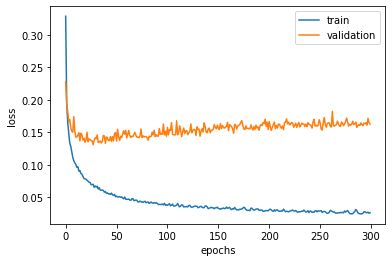

In [165]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

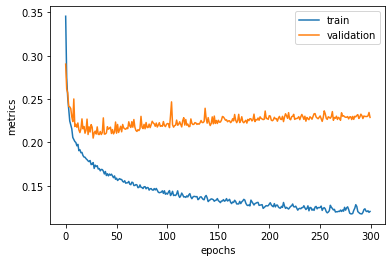

In [166]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [167]:
# 載入模型
model = keras.models.load_model('lab2-logs/models/Best-model-1.h5')
# 先將房屋價格取出
y_test = np.array(test_data['price'])
# 標準化數據
test_data = (test_data - mean) / std
# 將輸入數據存成Numpy 格式
x_test = np.array(test_data.drop('price', axis='columns'))
# 預測測試數據
y_pred = model.predict(x_test)
# 將預測結果轉換回來(因為訓練時的訓練目標也有經過標準化)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
# 計算平均的誤差百分比
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
# 顯示誤差百分比
print("Model_1 Percentage Error: {:.2f}%".format(percentage_error))

Model_1 Percentage Error: 13.88%


In [172]:
%reload_ext tensorboard

In [173]:
%tensorboard --port 6006 --logdir lab2-logs

Reusing TensorBoard on port 6006 (pid 15536), started 0:02:15 ago. (Use '!kill 15536' to kill it.)

Method 1: Limiting hidden layers number 64->16 to prevent overfitting

In [174]:
model_2 = keras.Sequential(name='model-2')

In [175]:
model_2.add(layers.Dense(16, activation='relu', input_shape=(21,)))

In [176]:
model_2.add(layers.Dense(16, activation='relu'))

In [177]:
model_2.add(layers.Dense(1))

In [178]:
model_2.compile(keras.optimizers.Adam(0.001),
               loss=keras.losses.MeanSquaredError(),
               metrics=[keras.metrics.MeanAbsoluteError()])

In [179]:
log_dir = os.path.join('lab2-logs','model-2')

In [180]:
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

In [182]:
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5',
                                             monitor='val_mean_absolute_error',
                                             save_best_only=True,
                                             mode='min')

In [183]:
model_2.fit(x_train, y_train,
            batch_size=64,
            epochs=300,
            validation_data=(x_val,y_val),
            callbacks=[model_cbk, model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 2s 136us/sample - loss: 0.5956 - mean_absolute_error: 0.4629 - val_loss: 0.3245 - val_mean_absolute_error: 0.3615
Epoch 2/300
12967/12967 [==============================] - 1s 73us/sample - loss: 0.2740 - mean_absolute_error: 0.3340 - val_loss: 0.2681 - val_mean_absolute_error: 0.3261
Epoch 3/300
12967/12967 [==============================] - 1s 77us/sample - loss: 0.2335 - mean_absolute_error: 0.3068 - val_loss: 0.2409 - val_mean_absolute_error: 0.3031
Epoch 4/300
12967/12967 [==============================] - 1s 77us/sample - loss: 0.2126 - mean_absolute_error: 0.2915 - val_loss: 0.2242 - val_mean_absolute_error: 0.2918
Epoch 5/300
12967/12967 [==============================] - 1s 76us/sample - loss: 0.1950 - mean_absolute_error: 0.2795 - val_loss: 0.2162 - val_mean_absolute_error: 0.2844
Epoch 6/300
12967/12967 [==============================] - 1s 79us/sample - loss: 0.1828 -

Epoch 48/300
12967/12967 [==============================] - 2s 120us/sample - loss: 0.0933 - mean_absolute_error: 0.1917 - val_loss: 0.1370 - val_mean_absolute_error: 0.2105
Epoch 49/300
12967/12967 [==============================] - 2s 138us/sample - loss: 0.0942 - mean_absolute_error: 0.1936 - val_loss: 0.1343 - val_mean_absolute_error: 0.2075
Epoch 50/300
12967/12967 [==============================] - 1s 67us/sample - loss: 0.0930 - mean_absolute_error: 0.1914 - val_loss: 0.1359 - val_mean_absolute_error: 0.2077
Epoch 51/300
12967/12967 [==============================] - 2s 125us/sample - loss: 0.0926 - mean_absolute_error: 0.1914 - val_loss: 0.1351 - val_mean_absolute_error: 0.2079
Epoch 52/300
12967/12967 [==============================] - 1s 73us/sample - loss: 0.0918 - mean_absolute_error: 0.1900 - val_loss: 0.1370 - val_mean_absolute_error: 0.2118
Epoch 53/300
12967/12967 [==============================] - 2s 165us/sample - loss: 0.0914 - mean_absolute_error: 0.1905 - val_loss:

12967/12967 [==============================] - 1s 68us/sample - loss: 0.0829 - mean_absolute_error: 0.1840 - val_loss: 0.1353 - val_mean_absolute_error: 0.2077
Epoch 96/300
12967/12967 [==============================] - 1s 70us/sample - loss: 0.0811 - mean_absolute_error: 0.1823 - val_loss: 0.1359 - val_mean_absolute_error: 0.2091
Epoch 97/300
12967/12967 [==============================] - 1s 67us/sample - loss: 0.0825 - mean_absolute_error: 0.1841 - val_loss: 0.1333 - val_mean_absolute_error: 0.2066
Epoch 98/300
12967/12967 [==============================] - 2s 159us/sample - loss: 0.0818 - mean_absolute_error: 0.1836 - val_loss: 0.1388 - val_mean_absolute_error: 0.2056
Epoch 99/300
12967/12967 [==============================] - 1s 103us/sample - loss: 0.0818 - mean_absolute_error: 0.1836 - val_loss: 0.1403 - val_mean_absolute_error: 0.2131
Epoch 100/300
12967/12967 [==============================] - 1s 80us/sample - loss: 0.0816 - mean_absolute_error: 0.1835 - val_loss: 0.1376 - val_

12967/12967 [==============================] - 1s 66us/sample - loss: 0.0787 - mean_absolute_error: 0.1808 - val_loss: 0.1371 - val_mean_absolute_error: 0.2119
Epoch 143/300
12967/12967 [==============================] - 1s 103us/sample - loss: 0.0765 - mean_absolute_error: 0.1802 - val_loss: 0.1369 - val_mean_absolute_error: 0.2059
Epoch 144/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0768 - mean_absolute_error: 0.1799 - val_loss: 0.1378 - val_mean_absolute_error: 0.2039
Epoch 145/300
12967/12967 [==============================] - 1s 81us/sample - loss: 0.0770 - mean_absolute_error: 0.1794 - val_loss: 0.1349 - val_mean_absolute_error: 0.2025
Epoch 146/300
12967/12967 [==============================] - 1s 98us/sample - loss: 0.0786 - mean_absolute_error: 0.1813 - val_loss: 0.1355 - val_mean_absolute_error: 0.2019
Epoch 147/300
12967/12967 [==============================] - 2s 143us/sample - loss: 0.0770 - mean_absolute_error: 0.1796 - val_loss: 0.1395 - 

Epoch 189/300
12967/12967 [==============================] - 1s 67us/sample - loss: 0.0753 - mean_absolute_error: 0.1797 - val_loss: 0.1434 - val_mean_absolute_error: 0.2049
Epoch 190/300
12967/12967 [==============================] - 1s 66us/sample - loss: 0.0736 - mean_absolute_error: 0.1774 - val_loss: 0.1366 - val_mean_absolute_error: 0.2042
Epoch 191/300
12967/12967 [==============================] - 1s 66us/sample - loss: 0.0741 - mean_absolute_error: 0.1778 - val_loss: 0.1408 - val_mean_absolute_error: 0.2061
Epoch 192/300
12967/12967 [==============================] - 1s 64us/sample - loss: 0.0747 - mean_absolute_error: 0.1792 - val_loss: 0.1438 - val_mean_absolute_error: 0.2044
Epoch 193/300
12967/12967 [==============================] - 1s 67us/sample - loss: 0.0743 - mean_absolute_error: 0.1780 - val_loss: 0.1477 - val_mean_absolute_error: 0.2133
Epoch 194/300
12967/12967 [==============================] - 5s 378us/sample - loss: 0.0746 - mean_absolute_error: 0.1785 - val_lo

Epoch 236/300
12967/12967 [==============================] - 1s 115us/sample - loss: 0.0731 - mean_absolute_error: 0.1773 - val_loss: 0.1536 - val_mean_absolute_error: 0.2057
Epoch 237/300
12967/12967 [==============================] - 2s 122us/sample - loss: 0.0736 - mean_absolute_error: 0.1774 - val_loss: 0.1439 - val_mean_absolute_error: 0.2073
Epoch 238/300
12967/12967 [==============================] - 2s 172us/sample - loss: 0.0727 - mean_absolute_error: 0.1771 - val_loss: 0.1516 - val_mean_absolute_error: 0.2062
Epoch 239/300
12967/12967 [==============================] - 2s 125us/sample - loss: 0.0726 - mean_absolute_error: 0.1773 - val_loss: 0.1476 - val_mean_absolute_error: 0.2104
Epoch 240/300
12967/12967 [==============================] - 2s 176us/sample - loss: 0.0731 - mean_absolute_error: 0.1771 - val_loss: 0.1512 - val_mean_absolute_error: 0.2101
Epoch 241/300
12967/12967 [==============================] - 1s 67us/sample - loss: 0.0732 - mean_absolute_error: 0.1781 - va

12967/12967 [==============================] - 1s 68us/sample - loss: 0.0718 - mean_absolute_error: 0.1758 - val_loss: 0.1484 - val_mean_absolute_error: 0.2024
Epoch 283/300
12967/12967 [==============================] - 1s 70us/sample - loss: 0.0718 - mean_absolute_error: 0.1760 - val_loss: 0.1503 - val_mean_absolute_error: 0.2077
Epoch 284/300
12967/12967 [==============================] - 1s 68us/sample - loss: 0.0725 - mean_absolute_error: 0.1776 - val_loss: 0.1476 - val_mean_absolute_error: 0.2027
Epoch 285/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0716 - mean_absolute_error: 0.1760 - val_loss: 0.1532 - val_mean_absolute_error: 0.2037
Epoch 286/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0720 - mean_absolute_error: 0.1776 - val_loss: 0.1490 - val_mean_absolute_error: 0.2027
Epoch 287/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0718 - mean_absolute_error: 0.1764 - val_loss: 0.1510 - va

Method 2: Using weights regularization

In [184]:
model_3 = keras.Sequential(name='model-3')

In [185]:
model_3.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001),
                         activation='relu', input_shape=(21,)))

In [186]:
model_3.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001),
                         activation='relu'))

In [187]:
model_3.add(layers.Dense(1))

In [188]:
model_3.compile(keras.optimizers.Adam(0.001),
               loss=keras.losses.MeanSquaredError(),
               metrics=[keras.metrics.MeanAbsoluteError()])

In [189]:
log_dir = os.path.join('lab2-logs','model-3')

In [190]:
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

In [191]:
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-3.h5',
                                             monitor='val_mean_absolute_error',
                                             save_best_only=True,
                                             mode='min')

In [192]:
model_3.fit(x_train, y_train,
            batch_size=64,
            epochs=300,
            validation_data=(x_val,y_val),
            callbacks=[model_cbk, model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 2s 122us/sample - loss: 0.3921 - mean_absolute_error: 0.3428 - val_loss: 0.3227 - val_mean_absolute_error: 0.3046
Epoch 2/300
12967/12967 [==============================] - 1s 78us/sample - loss: 0.2818 - mean_absolute_error: 0.2842 - val_loss: 0.2848 - val_mean_absolute_error: 0.2791
Epoch 3/300
12967/12967 [==============================] - 1s 78us/sample - loss: 0.2563 - mean_absolute_error: 0.2708 - val_loss: 0.2645 - val_mean_absolute_error: 0.2669
Epoch 4/300
12967/12967 [==============================] - 1s 77us/sample - loss: 0.2376 - mean_absolute_error: 0.2592 - val_loss: 0.2485 - val_mean_absolute_error: 0.2594
Epoch 5/300
12967/12967 [==============================] - 1s 73us/sample - loss: 0.2182 - mean_absolute_error: 0.2467 - val_loss: 0.2405 - val_mean_absolute_error: 0.2606
Epoch 6/300
12967/12967 [==============================] - 1s 77us/sample - loss: 0.1997 -

12967/12967 [==============================] - 2s 156us/sample - loss: 0.1020 - mean_absolute_error: 0.1769 - val_loss: 0.1498 - val_mean_absolute_error: 0.1979
Epoch 49/300
12967/12967 [==============================] - 2s 121us/sample - loss: 0.1017 - mean_absolute_error: 0.1756 - val_loss: 0.1468 - val_mean_absolute_error: 0.1927
Epoch 50/300
12967/12967 [==============================] - 1s 70us/sample - loss: 0.1024 - mean_absolute_error: 0.1780 - val_loss: 0.1465 - val_mean_absolute_error: 0.1984
Epoch 51/300
12967/12967 [==============================] - 1s 70us/sample - loss: 0.1015 - mean_absolute_error: 0.1768 - val_loss: 0.1457 - val_mean_absolute_error: 0.1984
Epoch 52/300
12967/12967 [==============================] - 1s 70us/sample - loss: 0.1014 - mean_absolute_error: 0.1757 - val_loss: 0.1502 - val_mean_absolute_error: 0.2013
Epoch 53/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0974 - mean_absolute_error: 0.1729 - val_loss: 0.1644 - val_m

12967/12967 [==============================] - 1s 69us/sample - loss: 0.0869 - mean_absolute_error: 0.1677 - val_loss: 0.1519 - val_mean_absolute_error: 0.1989
Epoch 96/300
12967/12967 [==============================] - 1s 69us/sample - loss: 0.0888 - mean_absolute_error: 0.1676 - val_loss: 0.1482 - val_mean_absolute_error: 0.1968
Epoch 97/300
12967/12967 [==============================] - 1s 60us/sample - loss: 0.0867 - mean_absolute_error: 0.1674 - val_loss: 0.1450 - val_mean_absolute_error: 0.2004
Epoch 98/300
12967/12967 [==============================] - 1s 62us/sample - loss: 0.0858 - mean_absolute_error: 0.1678 - val_loss: 0.1454 - val_mean_absolute_error: 0.1947
Epoch 99/300
12967/12967 [==============================] - 1s 60us/sample - loss: 0.0857 - mean_absolute_error: 0.1672 - val_loss: 0.1468 - val_mean_absolute_error: 0.1970
Epoch 100/300
12967/12967 [==============================] - 1s 59us/sample - loss: 0.0869 - mean_absolute_error: 0.1670 - val_loss: 0.1598 - val_me

12967/12967 [==============================] - 1s 57us/sample - loss: 0.0828 - mean_absolute_error: 0.1668 - val_loss: 0.1590 - val_mean_absolute_error: 0.1976
Epoch 143/300
12967/12967 [==============================] - 1s 58us/sample - loss: 0.0809 - mean_absolute_error: 0.1635 - val_loss: 0.1591 - val_mean_absolute_error: 0.2034
Epoch 144/300
12967/12967 [==============================] - 1s 58us/sample - loss: 0.0833 - mean_absolute_error: 0.1660 - val_loss: 0.1500 - val_mean_absolute_error: 0.1994
Epoch 145/300
12967/12967 [==============================] - 1s 57us/sample - loss: 0.0829 - mean_absolute_error: 0.1644 - val_loss: 0.1627 - val_mean_absolute_error: 0.1951
Epoch 146/300
12967/12967 [==============================] - 1s 58us/sample - loss: 0.0776 - mean_absolute_error: 0.1607 - val_loss: 0.1504 - val_mean_absolute_error: 0.1996
Epoch 147/300
12967/12967 [==============================] - 1s 57us/sample - loss: 0.0779 - mean_absolute_error: 0.1621 - val_loss: 0.1748 - va

Epoch 189/300
12967/12967 [==============================] - 1s 60us/sample - loss: 0.0766 - mean_absolute_error: 0.1606 - val_loss: 0.1542 - val_mean_absolute_error: 0.1986
Epoch 190/300
12967/12967 [==============================] - 1s 64us/sample - loss: 0.0750 - mean_absolute_error: 0.1585 - val_loss: 0.1508 - val_mean_absolute_error: 0.1959
Epoch 191/300
12967/12967 [==============================] - 1s 61us/sample - loss: 0.0749 - mean_absolute_error: 0.1587 - val_loss: 0.1604 - val_mean_absolute_error: 0.2004
Epoch 192/300
12967/12967 [==============================] - 1s 60us/sample - loss: 0.0746 - mean_absolute_error: 0.1590 - val_loss: 0.1569 - val_mean_absolute_error: 0.1983
Epoch 193/300
12967/12967 [==============================] - 1s 65us/sample - loss: 0.0786 - mean_absolute_error: 0.1634 - val_loss: 0.1756 - val_mean_absolute_error: 0.2001
Epoch 194/300
12967/12967 [==============================] - 1s 72us/sample - loss: 0.0806 - mean_absolute_error: 0.1627 - val_los

12967/12967 [==============================] - 1s 71us/sample - loss: 0.0719 - mean_absolute_error: 0.1570 - val_loss: 0.1620 - val_mean_absolute_error: 0.2035
Epoch 237/300
12967/12967 [==============================] - 2s 159us/sample - loss: 0.0741 - mean_absolute_error: 0.1588 - val_loss: 0.1581 - val_mean_absolute_error: 0.1983
Epoch 238/300
12967/12967 [==============================] - 2s 142us/sample - loss: 0.0736 - mean_absolute_error: 0.1574 - val_loss: 0.1534 - val_mean_absolute_error: 0.1999
Epoch 239/300
12967/12967 [==============================] - 6s 458us/sample - loss: 0.0728 - mean_absolute_error: 0.1571 - val_loss: 0.1683 - val_mean_absolute_error: 0.2013
Epoch 240/300
12967/12967 [==============================] - 1s 70us/sample - loss: 0.0737 - mean_absolute_error: 0.1585 - val_loss: 0.1567 - val_mean_absolute_error: 0.2034
Epoch 241/300
12967/12967 [==============================] - 1s 70us/sample - loss: 0.0733 - mean_absolute_error: 0.1574 - val_loss: 0.1583 -

12967/12967 [==============================] - 1s 73us/sample - loss: 0.0711 - mean_absolute_error: 0.1566 - val_loss: 0.1536 - val_mean_absolute_error: 0.1975
Epoch 284/300
12967/12967 [==============================] - 1s 77us/sample - loss: 0.0684 - mean_absolute_error: 0.1539 - val_loss: 0.1647 - val_mean_absolute_error: 0.2030
Epoch 285/300
12967/12967 [==============================] - 1s 73us/sample - loss: 0.0725 - mean_absolute_error: 0.1581 - val_loss: 0.1588 - val_mean_absolute_error: 0.2099
Epoch 286/300
12967/12967 [==============================] - 1s 78us/sample - loss: 0.0698 - mean_absolute_error: 0.1560 - val_loss: 0.1591 - val_mean_absolute_error: 0.2021
Epoch 287/300
12967/12967 [==============================] - 1s 75us/sample - loss: 0.0696 - mean_absolute_error: 0.1555 - val_loss: 0.1437 - val_mean_absolute_error: 0.1970
Epoch 288/300
12967/12967 [==============================] - 1s 75us/sample - loss: 0.0698 - mean_absolute_error: 0.1545 - val_loss: 0.1797 - va

Method 3: Adding dropout (dropout rate 30%)

In [193]:
model_4 = keras.Sequential(name='model-4')

In [194]:
model_4.add(layers.Dense(64,activation='relu', input_shape=(21,)))

In [195]:
model_4.add(layers.Dropout(0.3))

In [196]:
model_4.add(layers.Dense(64, activation='relu'))

In [197]:
model_4.add(layers.Dropout(0.3))

In [198]:
model_4.add(layers.Dense(1))

In [199]:
model_4.compile(keras.optimizers.Adam(0.001),
               loss=keras.losses.MeanSquaredError(),
               metrics=[keras.metrics.MeanAbsoluteError()])

In [200]:
log_dir = os.path.join('lab2-logs','model-4')

In [201]:
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

In [202]:
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-4.h5',
                                             monitor='val_mean_absolute_error',
                                             save_best_only=True,
                                             mode='min')

In [203]:
model_4.fit(x_train, y_train,
            batch_size=64,
            epochs=300,
            validation_data=(x_val,y_val),
            callbacks=[model_cbk, model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 2s 163us/sample - loss: 0.5000 - mean_absolute_error: 0.4543 - val_loss: 0.2899 - val_mean_absolute_error: 0.3405
Epoch 2/300
12967/12967 [==============================] - 1s 94us/sample - loss: 0.3287 - mean_absolute_error: 0.3611 - val_loss: 0.2558 - val_mean_absolute_error: 0.3109
Epoch 3/300
12967/12967 [==============================] - 1s 87us/sample - loss: 0.2956 - mean_absolute_error: 0.3400 - val_loss: 0.2487 - val_mean_absolute_error: 0.3041
Epoch 4/300
12967/12967 [==============================] - 1s 87us/sample - loss: 0.2599 - mean_absolute_error: 0.3188 - val_loss: 0.2174 - val_mean_absolute_error: 0.2964
Epoch 5/300
12967/12967 [==============================] - 1s 80us/sample - loss: 0.2476 - mean_absolute_error: 0.3141 - val_loss: 0.2447 - val_mean_absolute_error: 0.2974
Epoch 6/300
12967/12967 [==============================] - 1s 86us/sample - loss: 0.2296 -

12967/12967 [==============================] - 1s 72us/sample - loss: 0.1439 - mean_absolute_error: 0.2358 - val_loss: 0.1419 - val_mean_absolute_error: 0.2282
Epoch 49/300
12967/12967 [==============================] - 1s 78us/sample - loss: 0.1365 - mean_absolute_error: 0.2324 - val_loss: 0.1404 - val_mean_absolute_error: 0.2177
Epoch 50/300
12967/12967 [==============================] - 1s 72us/sample - loss: 0.1260 - mean_absolute_error: 0.2307 - val_loss: 0.1254 - val_mean_absolute_error: 0.2229
Epoch 51/300
12967/12967 [==============================] - 1s 70us/sample - loss: 0.1334 - mean_absolute_error: 0.2319 - val_loss: 0.1571 - val_mean_absolute_error: 0.2366
Epoch 52/300
12967/12967 [==============================] - 1s 68us/sample - loss: 0.1267 - mean_absolute_error: 0.2286 - val_loss: 0.1478 - val_mean_absolute_error: 0.2337
Epoch 53/300
12967/12967 [==============================] - 1s 63us/sample - loss: 0.1385 - mean_absolute_error: 0.2333 - val_loss: 0.1290 - val_mea

12967/12967 [==============================] - 1s 79us/sample - loss: 0.1177 - mean_absolute_error: 0.2203 - val_loss: 0.1297 - val_mean_absolute_error: 0.2161
Epoch 96/300
12967/12967 [==============================] - 1s 78us/sample - loss: 0.1171 - mean_absolute_error: 0.2204 - val_loss: 0.1269 - val_mean_absolute_error: 0.2171
Epoch 97/300
12967/12967 [==============================] - 1s 78us/sample - loss: 0.1120 - mean_absolute_error: 0.2185 - val_loss: 0.1296 - val_mean_absolute_error: 0.2139
Epoch 98/300
12967/12967 [==============================] - 1s 79us/sample - loss: 0.1208 - mean_absolute_error: 0.2195 - val_loss: 0.1372 - val_mean_absolute_error: 0.2178
Epoch 99/300
12967/12967 [==============================] - 1s 78us/sample - loss: 0.1188 - mean_absolute_error: 0.2208 - val_loss: 0.1276 - val_mean_absolute_error: 0.2203
Epoch 100/300
12967/12967 [==============================] - 1s 87us/sample - loss: 0.1161 - mean_absolute_error: 0.2175 - val_loss: 0.1254 - val_me

12967/12967 [==============================] - 1s 72us/sample - loss: 0.1118 - mean_absolute_error: 0.2174 - val_loss: 0.1440 - val_mean_absolute_error: 0.2174
Epoch 143/300
12967/12967 [==============================] - 1s 71us/sample - loss: 0.1092 - mean_absolute_error: 0.2137 - val_loss: 0.1304 - val_mean_absolute_error: 0.2134
Epoch 144/300
12967/12967 [==============================] - 1s 73us/sample - loss: 0.1106 - mean_absolute_error: 0.2155 - val_loss: 0.1349 - val_mean_absolute_error: 0.2260
Epoch 145/300
12967/12967 [==============================] - 2s 126us/sample - loss: 0.1096 - mean_absolute_error: 0.2162 - val_loss: 0.1296 - val_mean_absolute_error: 0.2203
Epoch 146/300
12967/12967 [==============================] - 1s 74us/sample - loss: 0.1065 - mean_absolute_error: 0.2135 - val_loss: 0.1266 - val_mean_absolute_error: 0.2191
Epoch 147/300
12967/12967 [==============================] - 2s 177us/sample - loss: 0.1089 - mean_absolute_error: 0.2153 - val_loss: 0.1319 - 

12967/12967 [==============================] - 1s 73us/sample - loss: 0.1060 - mean_absolute_error: 0.2106 - val_loss: 0.1352 - val_mean_absolute_error: 0.2109
Epoch 190/300
12967/12967 [==============================] - 1s 73us/sample - loss: 0.1028 - mean_absolute_error: 0.2102 - val_loss: 0.1317 - val_mean_absolute_error: 0.2171
Epoch 191/300
12967/12967 [==============================] - 1s 73us/sample - loss: 0.1037 - mean_absolute_error: 0.2108 - val_loss: 0.1221 - val_mean_absolute_error: 0.2138
Epoch 192/300
12967/12967 [==============================] - 1s 75us/sample - loss: 0.1103 - mean_absolute_error: 0.2129 - val_loss: 0.1237 - val_mean_absolute_error: 0.2120
Epoch 193/300
12967/12967 [==============================] - 1s 74us/sample - loss: 0.1099 - mean_absolute_error: 0.2131 - val_loss: 0.1325 - val_mean_absolute_error: 0.2255
Epoch 194/300
12967/12967 [==============================] - 1s 75us/sample - loss: 0.1128 - mean_absolute_error: 0.2131 - val_loss: 0.1438 - va

12967/12967 [==============================] - 1s 71us/sample - loss: 0.1004 - mean_absolute_error: 0.2094 - val_loss: 0.1227 - val_mean_absolute_error: 0.2161
Epoch 237/300
12967/12967 [==============================] - 1s 71us/sample - loss: 0.1065 - mean_absolute_error: 0.2109 - val_loss: 0.1288 - val_mean_absolute_error: 0.2155
Epoch 238/300
12967/12967 [==============================] - 1s 73us/sample - loss: 0.1101 - mean_absolute_error: 0.2130 - val_loss: 0.1418 - val_mean_absolute_error: 0.2306
Epoch 239/300
12967/12967 [==============================] - 1s 74us/sample - loss: 0.1088 - mean_absolute_error: 0.2119 - val_loss: 0.1299 - val_mean_absolute_error: 0.2186
Epoch 240/300
12967/12967 [==============================] - 1s 75us/sample - loss: 0.1018 - mean_absolute_error: 0.2085 - val_loss: 0.1190 - val_mean_absolute_error: 0.2220
Epoch 241/300
12967/12967 [==============================] - 1s 72us/sample - loss: 0.1064 - mean_absolute_error: 0.2113 - val_loss: 0.1422 - va

12967/12967 [==============================] - 1s 72us/sample - loss: 0.1011 - mean_absolute_error: 0.2070 - val_loss: 0.1255 - val_mean_absolute_error: 0.2143
Epoch 283/300
12967/12967 [==============================] - 1s 74us/sample - loss: 0.0994 - mean_absolute_error: 0.2068 - val_loss: 0.1348 - val_mean_absolute_error: 0.2202
Epoch 284/300
12967/12967 [==============================] - 1s 66us/sample - loss: 0.1044 - mean_absolute_error: 0.2092 - val_loss: 0.1462 - val_mean_absolute_error: 0.2357
Epoch 285/300
12967/12967 [==============================] - 1s 61us/sample - loss: 0.0983 - mean_absolute_error: 0.2075 - val_loss: 0.1186 - val_mean_absolute_error: 0.2146
Epoch 286/300
12967/12967 [==============================] - 1s 62us/sample - loss: 0.1054 - mean_absolute_error: 0.2094 - val_loss: 0.1362 - val_mean_absolute_error: 0.2241
Epoch 287/300
12967/12967 [==============================] - 1s 63us/sample - loss: 0.1018 - mean_absolute_error: 0.2088 - val_loss: 0.1363 - va

In [204]:
model_2 = keras.models.load_model('lab2-logs/models/Best-model-2.h5')
y_pred = model_2.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model_2 Percentage Error: {:.2f}%".format(percentage_error))

Model_2 Percentage Error: 13.61%


In [205]:
model_3 = keras.models.load_model('lab2-logs/models/Best-model-3.h5')
y_pred = model_3.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model_3 Percentage Error: {:.2f}%".format(percentage_error))

Model_3 Percentage Error: 13.16%


In [206]:
model_4 = keras.models.load_model('lab2-logs/models/Best-model-4.h5')
y_pred = model_4.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model_4 Percentage Error: {:.2f}%".format(percentage_error))

Model_4 Percentage Error: 13.32%
